In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import data (20 newsgroups)


In [2]:
train = pd.read_csv('../data/train_cleaned_stemed_20newsgroups.csv', delimiter = ',')
test = pd.read_csv('../data/test_cleaned_stemed_20newsgroups.csv', delimiter = ',')
train 

,Unnamed: 0,X,Y
0,0,lerxst wam umd edu thing subject car nntp post...,7
1,1,guykuo carson u washington edu guy kuo subject...,4
2,2,twilli ec ecn purdu edu thoma e willi subject ...,4
3,3,jgreen amber joe green subject weitek p organ ...,1
4,4,jcm head cfa harvard edu jonathan mcdowel subj...,14
...,...,...,...
11309,11309,jim zisfein factori com jim zisfein subject mi...,13
11310,11310,ebodin pearl tuft edu subject screen death mac...,4
11311,11311,west netcom com est subject mount cpu cooler v...,3
11312,11312,steve hcrlgw steven collin subject sphere poin...,1


In [3]:
train_X = np.array(train["X"])
train_Y = np.array(train["Y"])
train_X.shape

(11314,)

In [4]:
test

,Unnamed: 0,X,Y
0,0,v mb k ubvmsd cc buffalo edu neil b gandler su...,7
1,1,rick miller rick ee uwm edu subject x face org...,5
2,2,mathew mathew manti co uk subject strong weak ...,0
3,3,bakken cs arizona edu dave bakken subject saud...,17
4,4,livesey solntz wpd sgi com jon livesey subject...,19
...,...,...,...
7527,7527,richmond spiff princeton edu stupend man subje...,14
7528,7528,smytonj murr alleg edu jim smyton subject moni...,4
7529,7529,hhenderson vax clarku edu subject game length ...,9
7530,7530,b zam utarlg uta edu subject intel chmo design...,6


In [5]:
test_X = np.array(test["X"])
test_Y = np.array(test["Y"])
test_X[:2]

array(['v mb k ubvmsd cc buffalo edu neil b gandler subject need info bonnevil organ univers buffalo line news softwar vax vm vnew nntp post host ubvmsd cc buffalo edu littl confus model bonnevil heard le se lse sse ssei could someon tell differ far featur perform also curiou know book valu prefer model much less book valu usual get word much demand time year heard mid spring earli summer best time buy neil gandler',
       'rick miller rick ee uwm edu subject x face organ line distribut world nntp post host summari go ahead swamp eep familiar format x face thingi see folk header got see mayb make one got dpg view linux box display uncompress x face manag compil un compfac look seem find x face anyon news header could would pleas send x face header know probabl get littl swamp handl hope rick miller rick ee uwm edu ricxjo discu mil wi us ricxjo muelisto send postcard get one back enposxtigu bildkarton kaj vi ricevo alion rick miller wood muskego wi usa'],
      dtype=object)

In [6]:
vectorizer = TfidfVectorizer()
train_data_vectors = vectorizer.fit_transform(train_X)
train_data_vectors.shape

(11314, 69684)

In [7]:
train_data_vectors[0]

<1x69684 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [8]:
test_data_vectors = vectorizer.transform(test_X)
test_data_vectors.shape

(7532, 69684)

In [9]:
bayes_classifier = MultinomialNB(alpha=0.01)
bayes_classifier

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [10]:
bayes_classifier.fit(train_data_vectors,train_Y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [11]:
test_predict = bayes_classifier.predict(test_data_vectors)
test_predict

array([ 7, 11,  0, ...,  9,  3, 15])

Accuracy Score:

In [12]:
acc = accuracy_score(test_Y, test_predict)
acc

0.8238183749336165

Text(0.5, 1, 'Confusion Matrix')

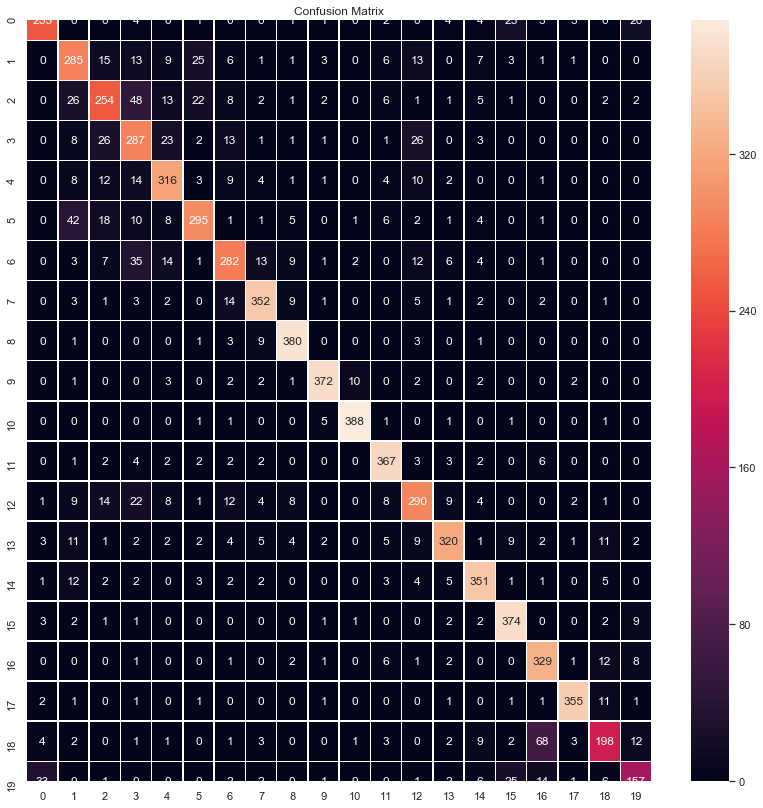

In [13]:
plt.figure(figsize=(14,14))
sns.set()
sns.heatmap(metrics.confusion_matrix(test_Y, test_predict) , annot=True, fmt="d", linewidths=.5)
plt.title("Confusion Matrix")

In [14]:
from sklearn import metrics

In [16]:
print(metrics.classification_report(test_Y, test_predict))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       319
           1       0.69      0.73      0.71       389
           2       0.72      0.64      0.68       394
           3       0.64      0.73      0.68       392
           4       0.79      0.82      0.80       385
           5       0.82      0.75      0.78       395
           6       0.78      0.72      0.75       390
           7       0.87      0.89      0.88       396
           8       0.90      0.95      0.93       398
           9       0.95      0.94      0.94       397
          10       0.96      0.97      0.97       399
          11       0.88      0.93      0.90       396
          12       0.76      0.74      0.75       393
          13       0.88      0.81      0.84       396
          14       0.86      0.89      0.88       394
          15       0.85      0.94      0.89       398
          16       0.77      0.90      0.83       364
          17       0.96    